<a href="https://colab.research.google.com/github/Prasid23/Assignment-1/blob/main/2418117_PrasidSunwar_RegressionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ="/content/drive/MyDrive/DATASET/diamonds (cleaned).csv"
df = pd.read_csv(path)
df.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [ ]:
df.isnull().sum()

,0
Shape,5
Cut,4303
Color,5
Clarity,5
Carat Weight,5
Length/Width Ratio,5
Depth %,7
Table %,17
Polish,20
Symmetry,20


In [ ]:
df.shape #Checking number of rows and columns

(6485, 18)

df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [ ]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


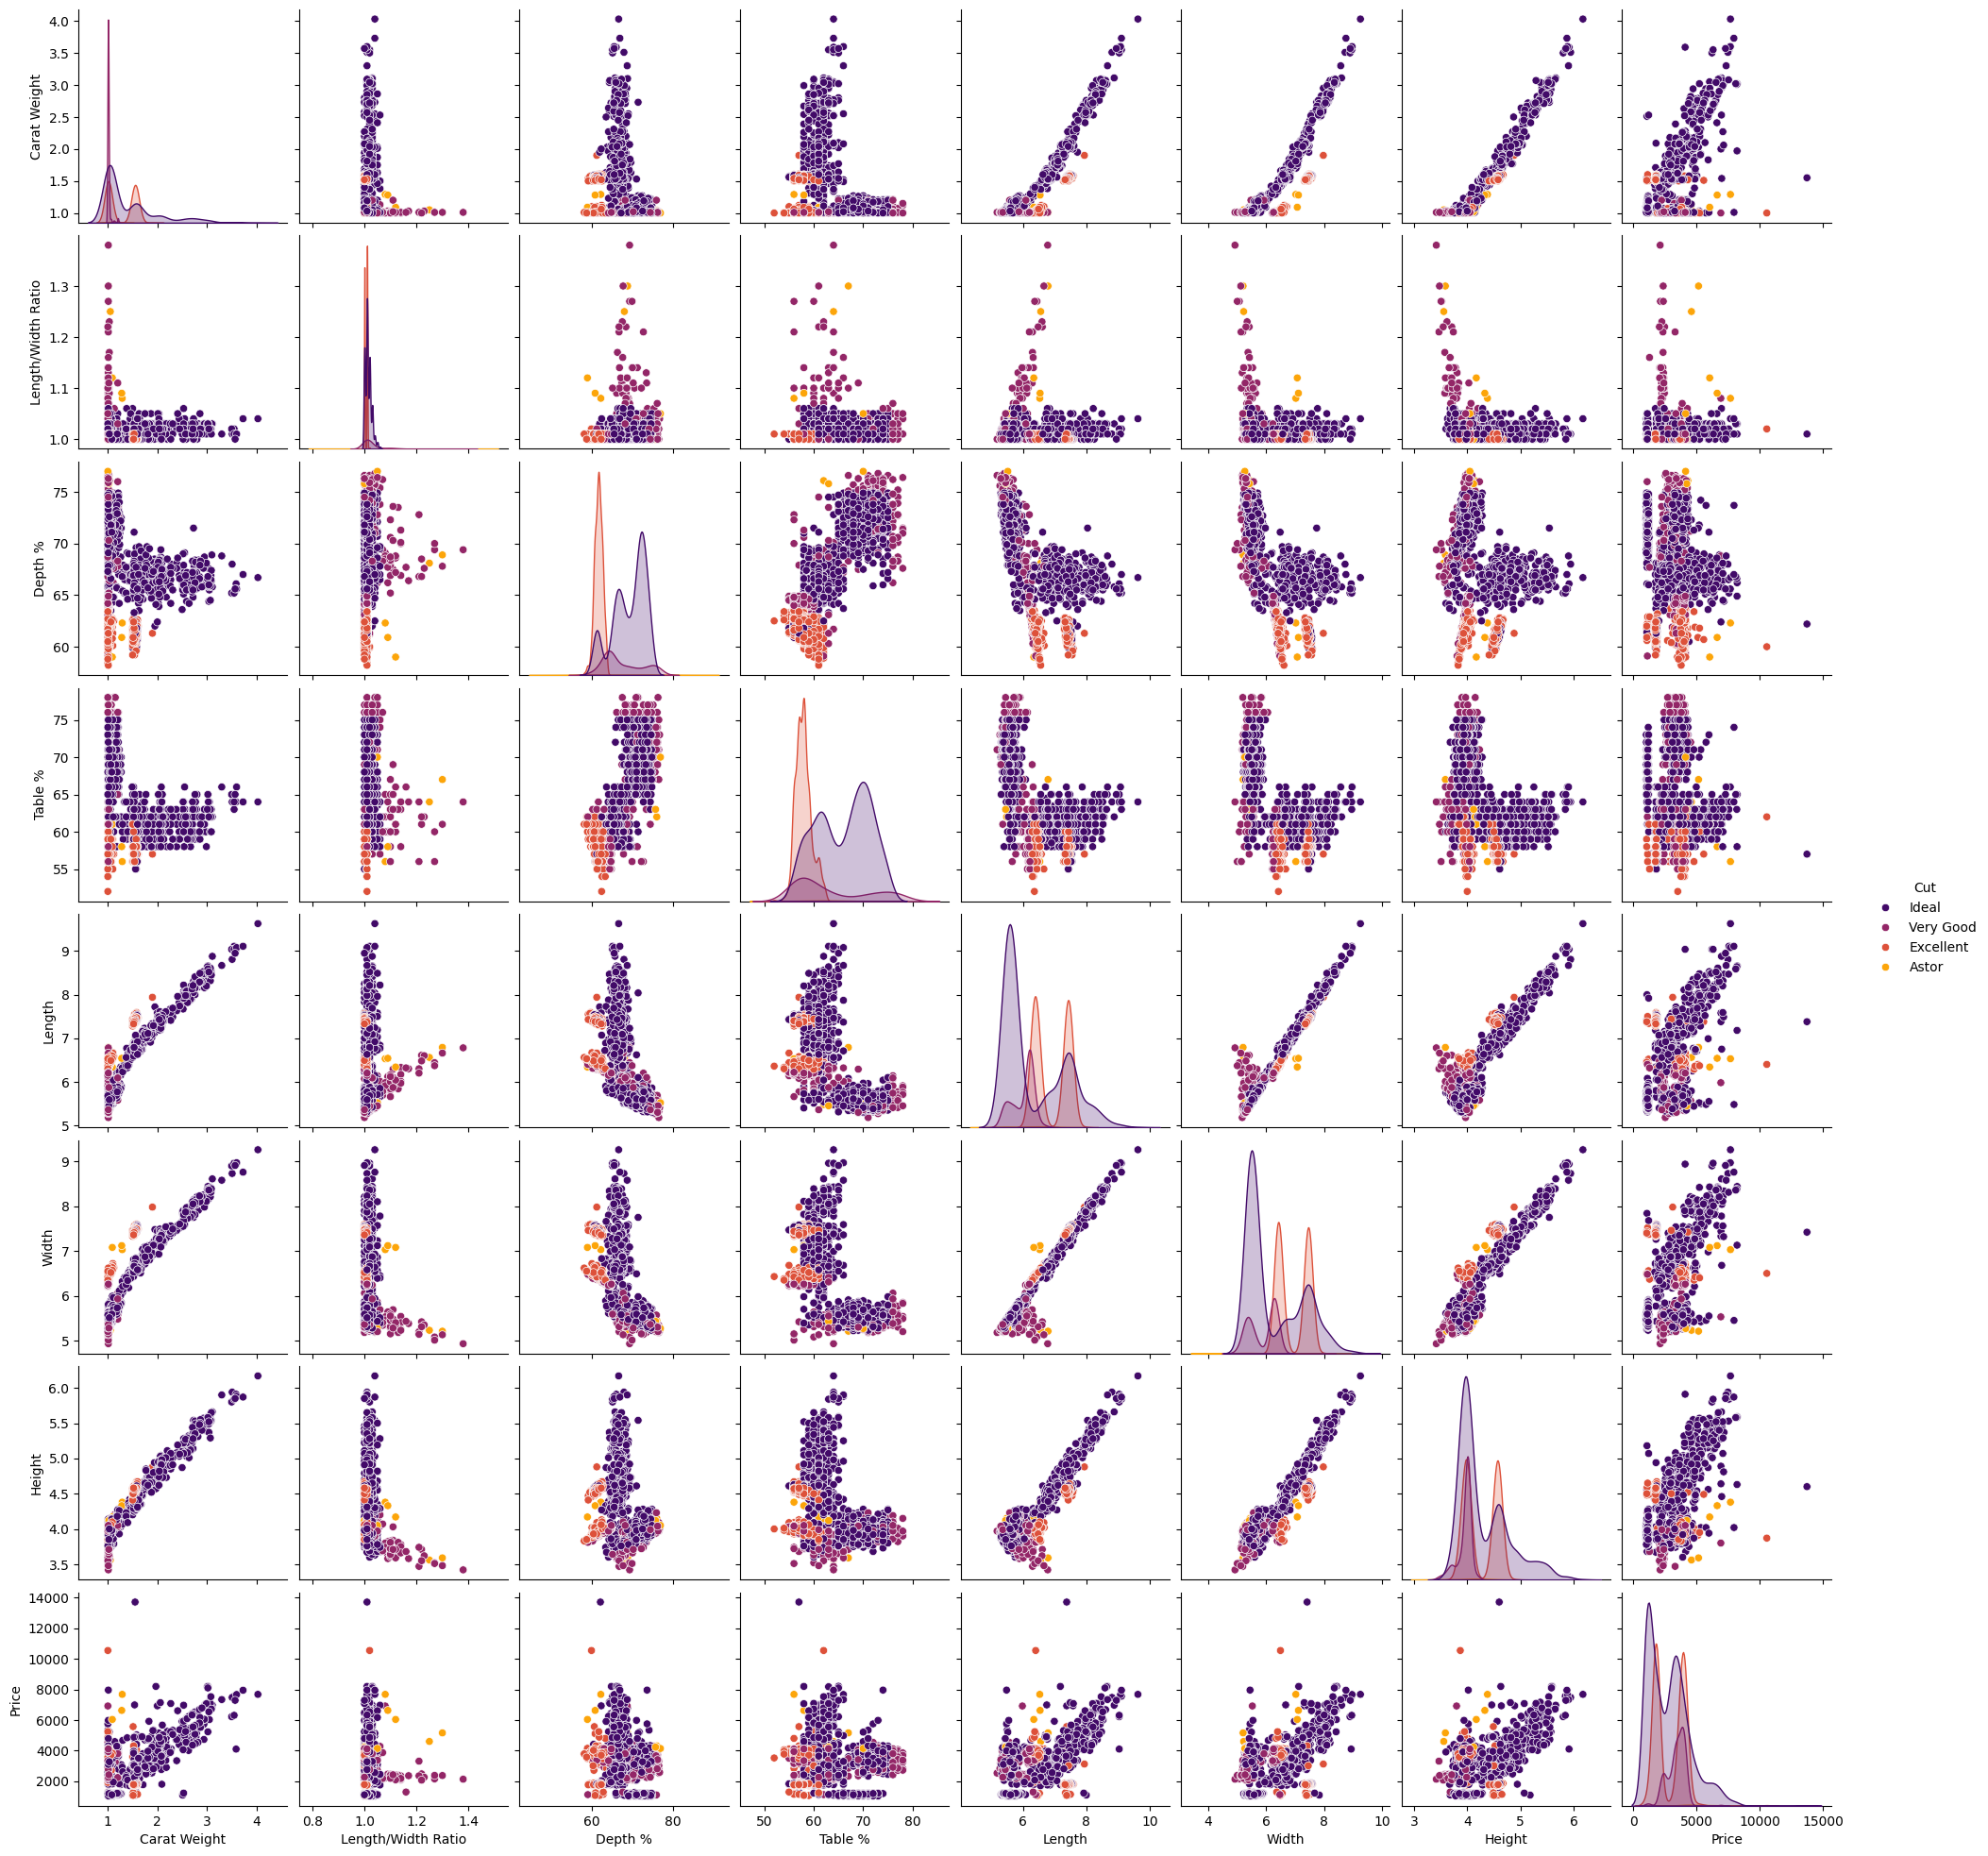

In [ ]:
#Looking at data
shade = ["#8356556", "baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue="Cut", palette='inferno')


In [ ]:
df.columns #checking the columns

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')

Text(0.5, 1.0, "Regression Line on Price vs 'Width'")

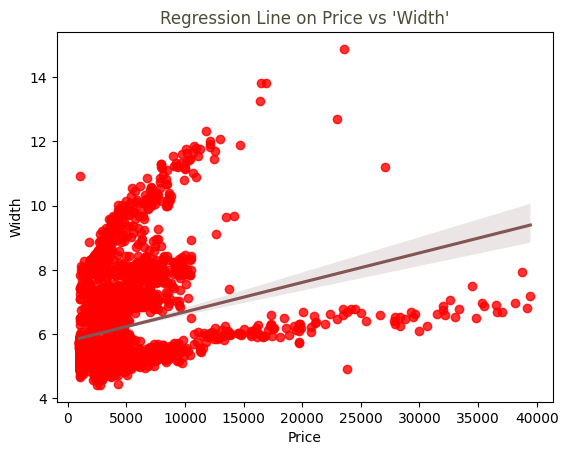

In [ ]:
ax = sns.regplot(x="Price", y="Width", data=df, fit_reg=True, scatter_kws={"color": "#FF0000"},line_kws={"color": "#835656"} )
ax.set_title("Regression Line on Price vs 'Width'",color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'Depth'")

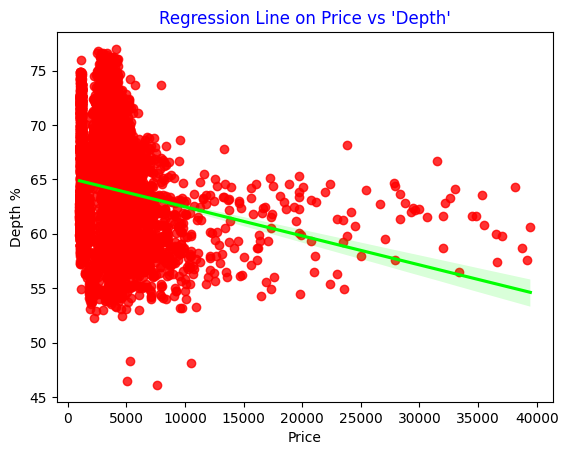

In [ ]:
ax = sns.regplot(x="Price", y="Depth %", data=df, fit_reg=True, scatter_kws={"color":"#FF0000"},line_kws={"color": "#00FF00"})
ax.set_title("Regression Line on Price vs 'Depth'",color="#0000FF")

Text(0.5, 1.0, "Regression Line on Price vs 'Table'")

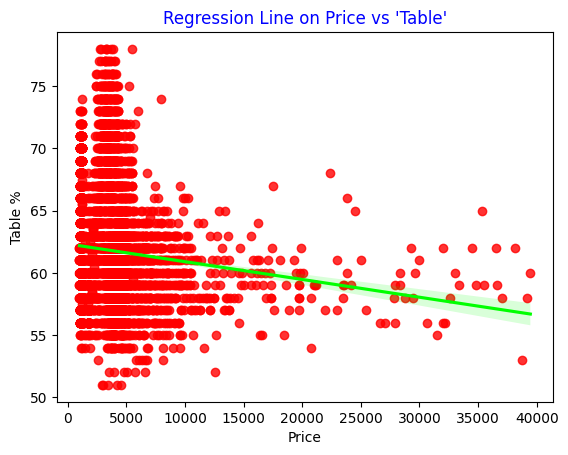

In [ ]:
 ax = sns.regplot(x="Price", y="Table %", data=df, fit_reg=True, scatter_kws={"color":"#FF0000"},line_kws={"color": "#00FF00"})
ax.set_title("Regression Line on Price vs 'Table'",color="#0000FF")

In [ ]:
#outliers removal

In [ ]:
#List of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Shape', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle', 'Culet', 'Type', 'Fluorescence']


<ipython-input-357-ddf74b63480a>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Cut", y="Price", data=df, hue="Cut", palette=shade, scale="count", legend=False)


Text(0.5, 0, 'Cut')

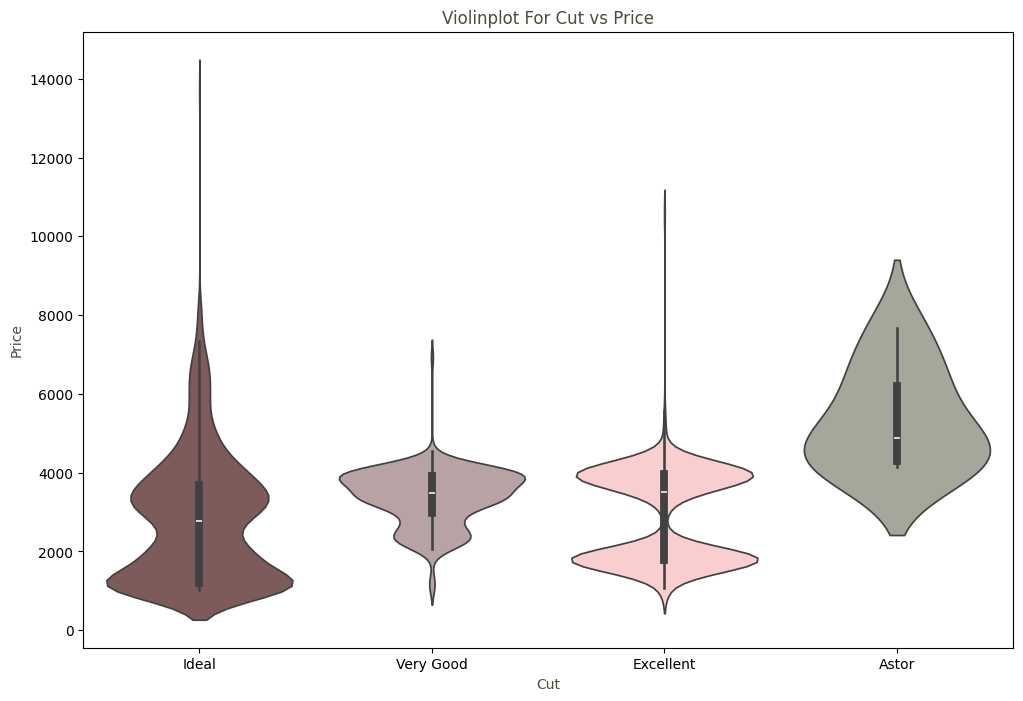

In [ ]:
#violinplot for Cut
shade = ["#835655", "#baa0a0", "#ffc7c8", "#a9a799"]  # Adjusted to match 4 categories

# Create Violin Plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cut", y="Price", data=df, hue="Cut", palette=shade, scale="count", legend=False)

# Customize plot
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

<ipython-input-358-f968d5a2c712>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Color",y="Price", data=df, palette=shade_1,scale= "count")
<ipython-input-358-f968d5a2c712>:4: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.violinplot(x="Color",y="Price", data=df, palette=shade_1,scale= "count")
<ipython-input-358-f968d5a2c712>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Color",y="Price", data=df, palette=shade_1,scale= "count")


Text(0.5, 0, 'Color')

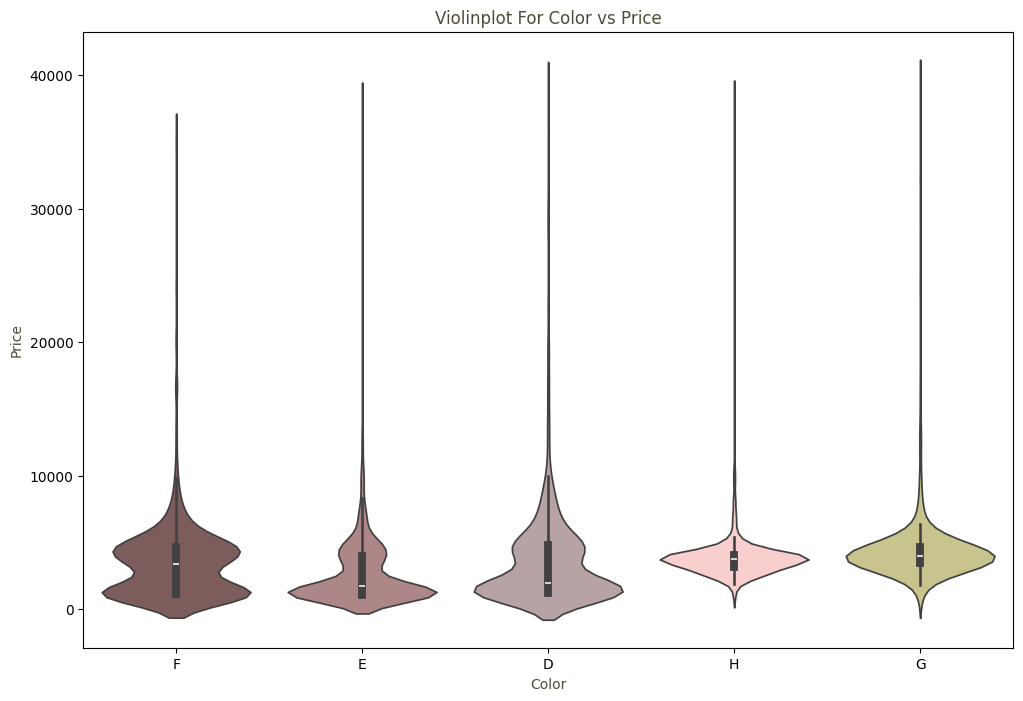

In [ ]:
#violinplot for Color
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Color",y="Price", data=df, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

<ipython-input-359-02291c8e65bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Clarity",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-359-02291c8e65bc>:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = sns.violinplot(x="Clarity",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-359-02291c8e65bc>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Clarity",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

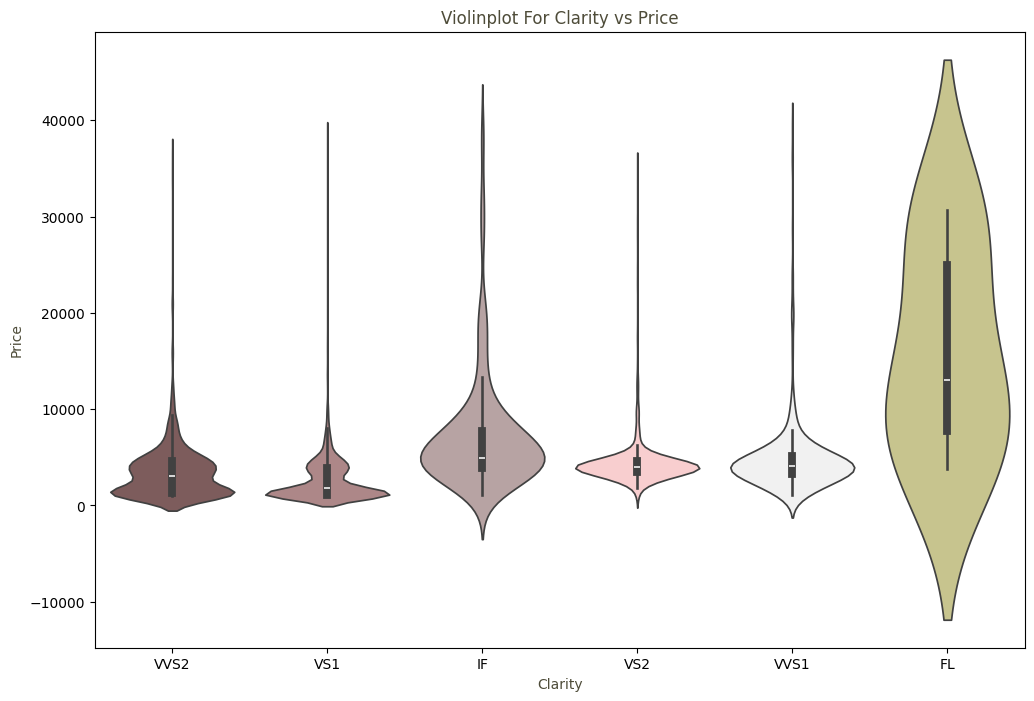

In [ ]:
#violinplot for Clarity
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Clarity",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-360-3265720b5524>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Polish",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-360-3265720b5524>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.violinplot(x="Polish",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-360-3265720b5524>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Polish",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

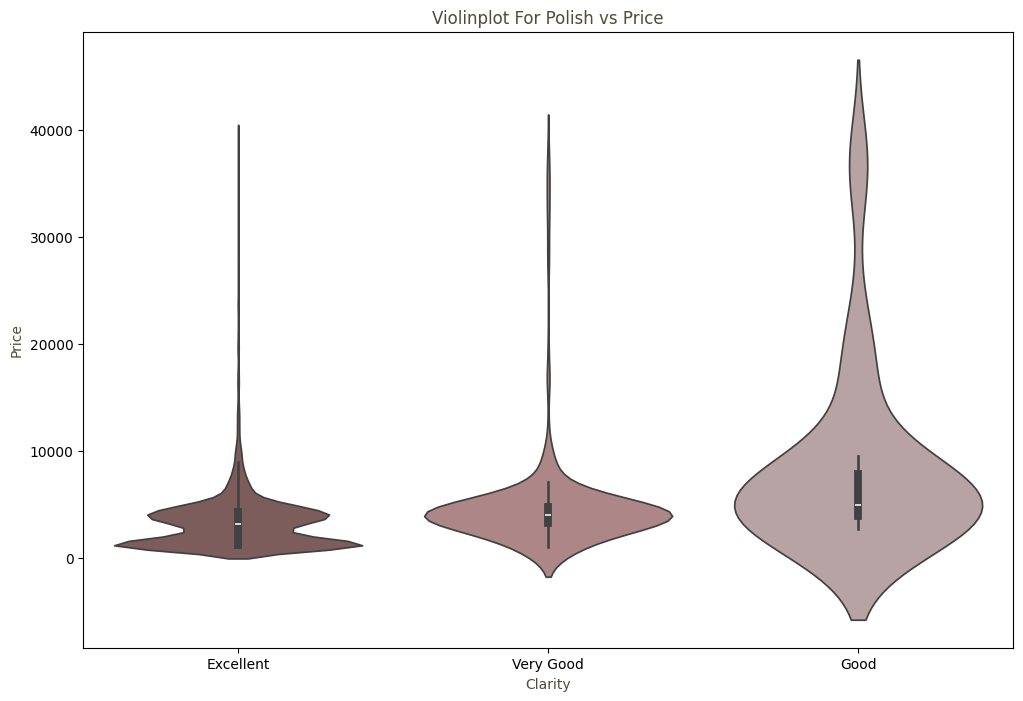

In [ ]:
#Violinplot for Polish
plt.figure(figsize=(12,8))
shade_3 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Polish",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Polish vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-361-cb21066f77da>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Symmetry",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-361-cb21066f77da>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.violinplot(x="Symmetry",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-361-cb21066f77da>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Symmetry",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

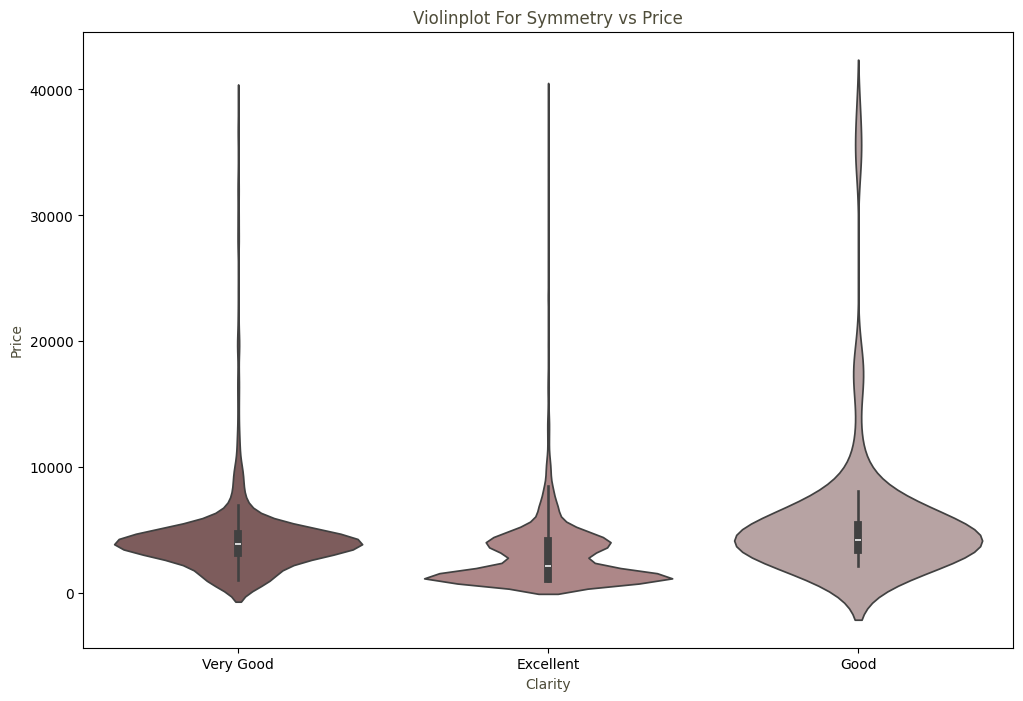

In [ ]:
#violinplot for Symmetry
plt.figure(figsize=(12,8))
shade_4 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Symmetry",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Symmetry vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-362-b8794719eba5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Shape",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-362-b8794719eba5>:4: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(x="Shape",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-362-b8794719eba5>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Shape",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

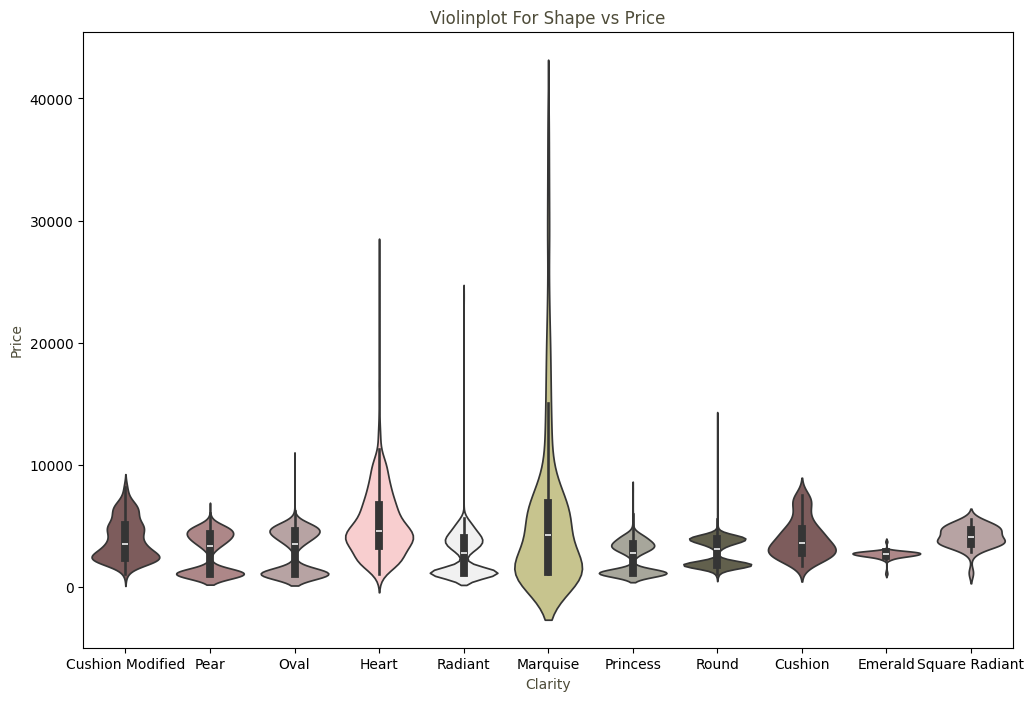

In [ ]:
#violinplot for Shape
plt.figure(figsize=(12,8))
shade_5 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Shape",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Shape vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-363-d8c06c392015>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Girdle",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-363-d8c06c392015>:4: UserWarning: 
The palette list has fewer values (8) than needed (29) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(x="Girdle",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-363-d8c06c392015>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Girdle",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

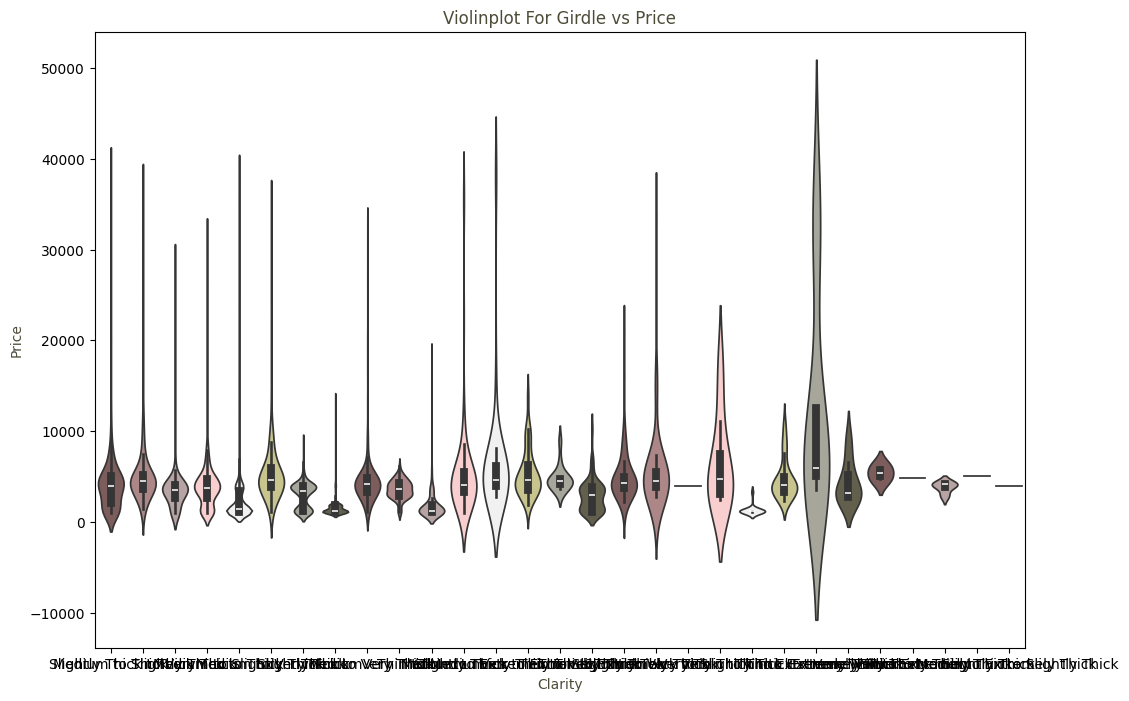

In [ ]:
#violinplot for Girdle
plt.figure(figsize=(12,8))
shade_6 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Girdle",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Girdle vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-364-cec8834403f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Culet",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-364-cec8834403f8>:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.violinplot(x="Culet",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-364-cec8834403f8>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Culet",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

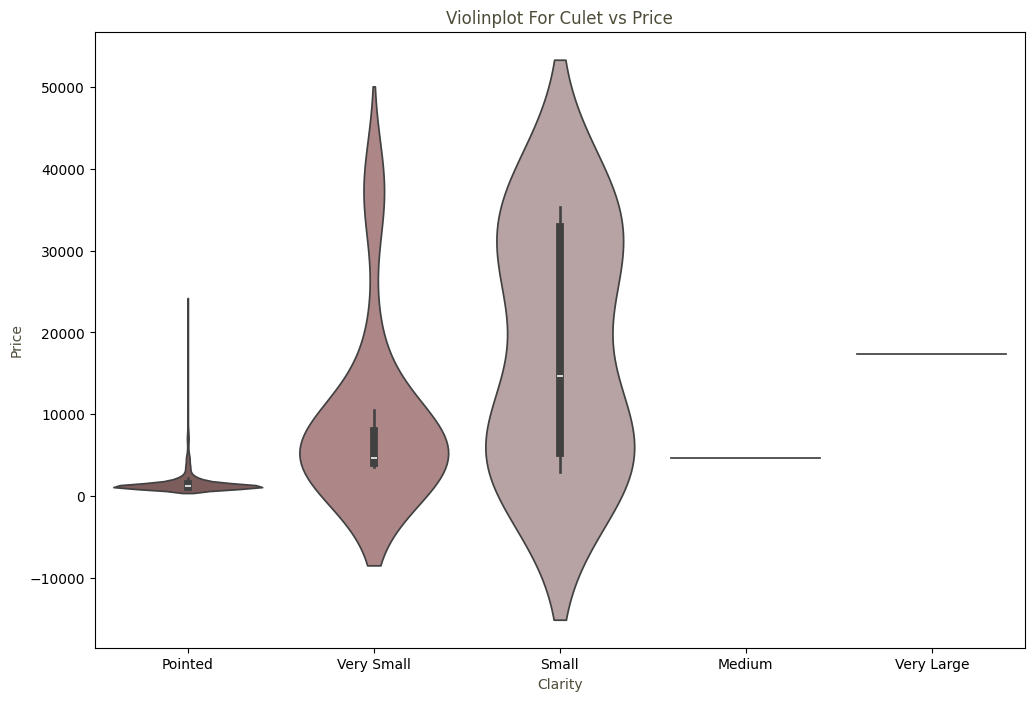

In [ ]:
#violinplot for Culet
plt.figure(figsize=(12,8))
shade_7 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Culet",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Culet vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-365-f9723bcd3d6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Type",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-365-f9723bcd3d6b>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.violinplot(x="Type",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-365-f9723bcd3d6b>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Type",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

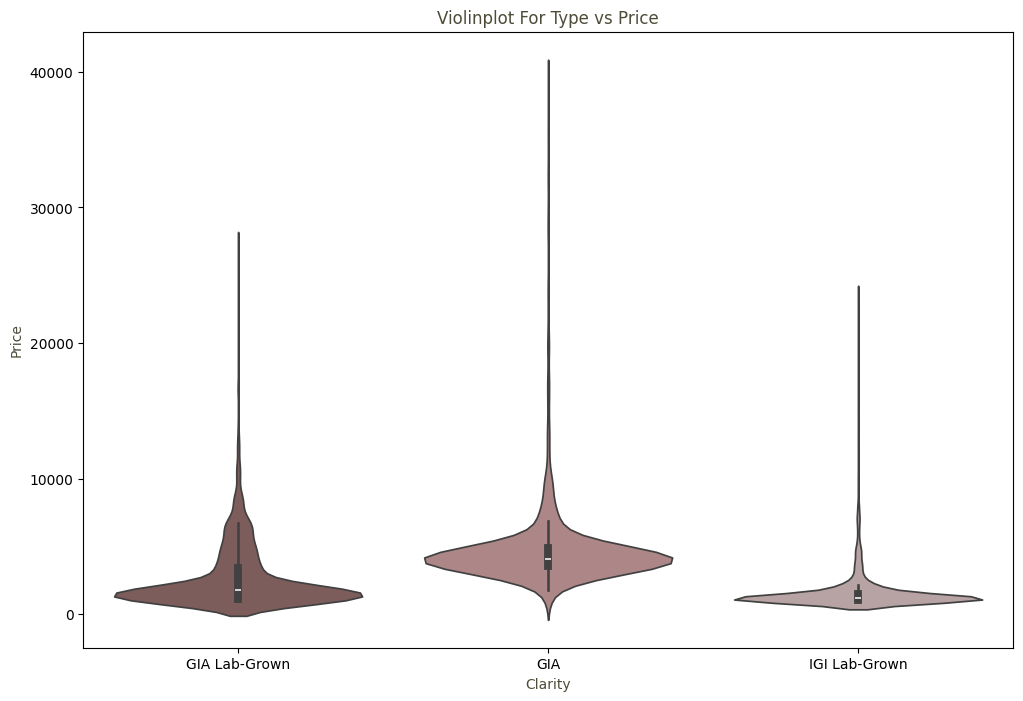

In [ ]:
#violinplot for Type
plt.figure(figsize=(12,8))
shade_8 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Type",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Type vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

<ipython-input-366-f147bc193df6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Fluorescence",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-366-f147bc193df6>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.violinplot(x="Fluorescence",y="Price", data=df, palette=shade_2,scale= "count")
<ipython-input-366-f147bc193df6>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="Fluorescence",y="Price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

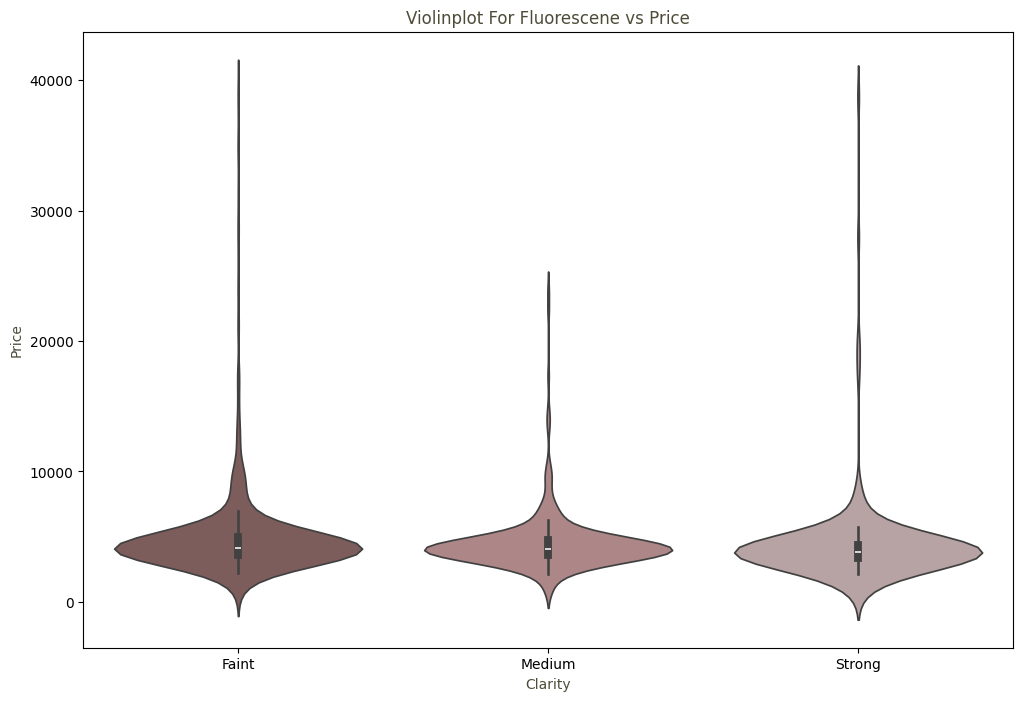

In [ ]:
#violinplot for Fluorescene
plt.figure(figsize=(12,8))
shade_9 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="Fluorescence",y="Price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Fluorescene vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

In [ ]:
# Make copy to avoid changing original data
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,1,2,2,5,1.84,1.02,65.8,59.0,0,2,7,5,7.09,6.95,4.57,2640,1,3
1,6,4,1,2,1.20,1.65,62.5,58.0,2,2,7,5,9.64,5.86,3.66,1070,1,3
2,5,4,1,2,1.19,1.41,63.1,63.0,2,2,7,5,8.44,6.00,3.79,1070,1,3
3,3,4,0,1,1.00,1.18,61.7,58.0,0,0,13,5,5.85,6.89,4.25,7110,0,0
4,8,4,4,2,1.01,1.35,69.4,66.0,0,2,14,5,6.80,5.05,3.50,3050,0,3


In [ ]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


<Axes: >

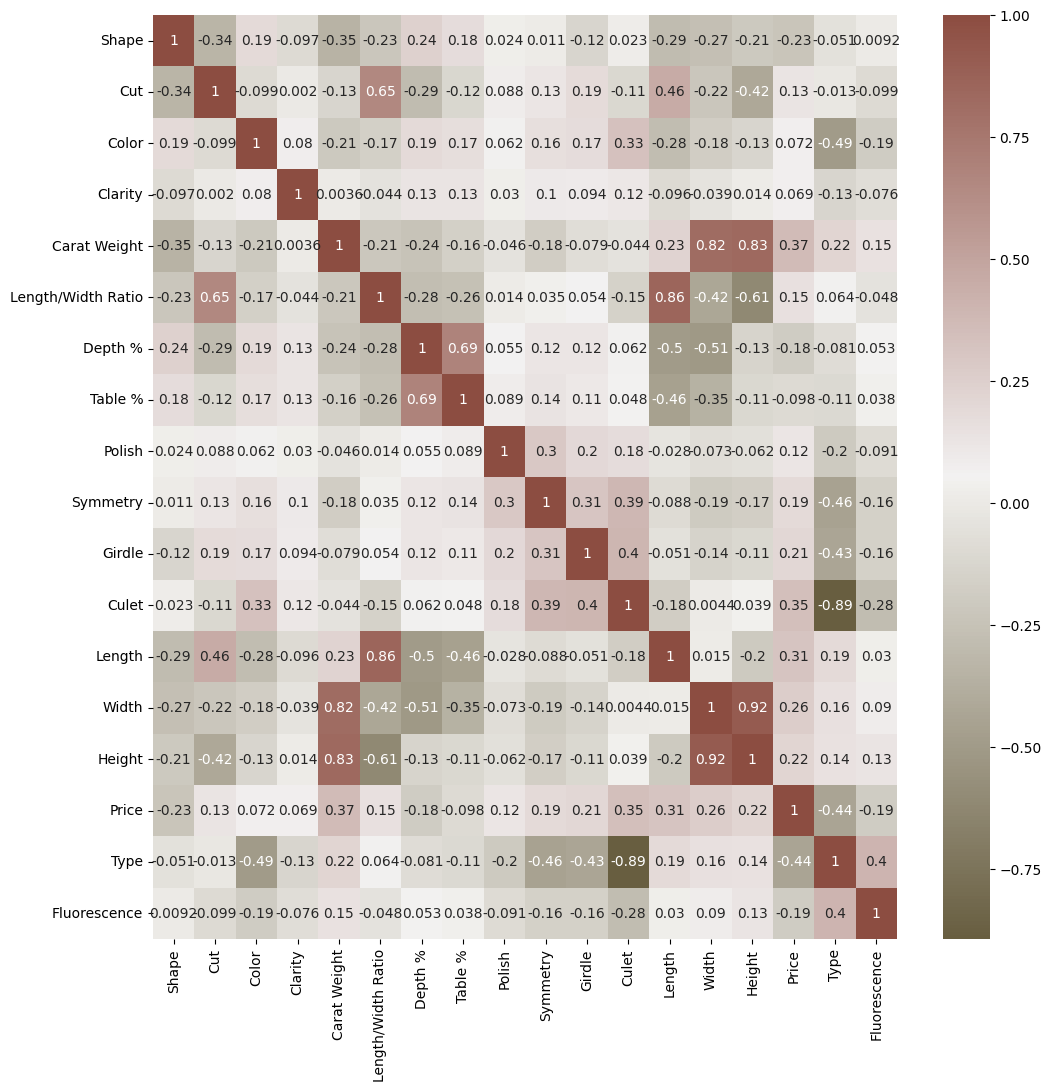

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [ ]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["Price"],axis =1)
y= label_data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
print(X_train.isnull().sum())  # Shows count of NaNs in each column

Shape                  0
Cut                    0
Color                  0
Clarity                0
Carat Weight           3
Length/Width Ratio     3
Depth %                5
Table %               14
Polish                 0
Symmetry               0
Girdle                 0
Culet                  0
Length                17
Width                 17
Height                17
Type                   0
Fluorescence           0
dtype: int64


In [ ]:
print(X_train[X_train.isnull().any(axis=1)])  # Displays rows with NaNs


      Shape  Cut  Color  Clarity  Carat Weight  Length/Width Ratio  Depth %  \
449       5    4      4        3          1.01                1.59     61.9   
250      11    4      5        6           NaN                 NaN      NaN   
356       9    1      0        2          1.59                1.01     60.6   
661       3    4      3        5          1.51                1.20     58.8   
4559      5    4      0        2          1.03                1.45     61.4   
430       1    2      0        5          2.85                1.02     66.8   
780       9    2      1        2          1.58                1.00      NaN   
2391      8    4      0        2          1.12                1.44     63.7   
355       4    4      0        3          2.01                1.85     64.6   
247       8    4      3        4          1.01                1.32     69.8   
1622      3    4      1        2          2.89                1.14     55.6   
6062     11    4      5        6           NaN      

In [ ]:
df = df.dropna()

In [ ]:
# Define pipelines with Imputer
pipeline_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar1", StandardScaler()),
    ("lr_classifier", LinearRegression())
])

pipeline_dt = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar2", StandardScaler()),
    ("dt_classifier", DecisionTreeRegressor())
])

pipeline_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar3", StandardScaler()),
    ("rf_classifier", RandomForestRegressor())
])

pipeline_kn = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar4", StandardScaler()),
    ("kn_classifier", KNeighborsRegressor())
])

pipeline_xgb = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scalar5", StandardScaler()),
    ("xgb_classifier", XGBRegressor())
])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for i, pipe in enumerate(pipelines):
    print(f"Training {pipe_dict[i]}...")
    pipe.fit(X_train, y_train)

print("All models trained successfully!")

Training LinearRegression...
Training DecisionTree...
Training RandomForest...
Training KNeighbors...
Training XGBRegressor...
All models trained successfully!


In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    mean_rmse = -cv_score.mean()  # Convert negative RMSE to positive
    cv_results_rms.append(mean_rmse)

    print(f"{pipe_dict[i]}: RMSE = {mean_rmse:.4f}")

LinearRegression: RMSE = 1940.5831
DecisionTree: RMSE = 1496.8514
RandomForest: RMSE = 1172.4797
KNeighbors: RMSE = 1430.0412


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", l

XGBRegressor: RMSE = nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", l

In [ ]:
df = df.dropna()

In [379]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics

# Assigning the features as X and target as y
X = label_data.drop(["Price"], axis=1)
y = label_data["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Handle missing values by replacing NaNs with column means
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on X_test
pred = model.predict(X_test)

# Evaluate the model
r2 = metrics.r2_score(y_test, pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("R²:", r2)
print("Adjusted R²:", adj_r2)
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print("MSE:", metrics.mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred)))


R²: 0.6185179952783468
Adjusted R²: 0.6144748568243144
MAE: 1175.9953321212233
MSE: 4814974.422968426
RMSE: 2194.304997708483
